<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tutorial-03:-Equilibrium-Lattice-Constant-and-Bulk-Modulus" data-toc-modified-id="Tutorial-03:-Equilibrium-Lattice-Constant-and-Bulk-Modulus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tutorial 03: Equilibrium Lattice Constant and Bulk Modulus</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Initialization</a></span></li><li><span><a href="#Reading-a-log-file" data-toc-modified-id="Reading-a-log-file-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Reading a log file</a></span></li><li><span><a href="#Equilibrium-lattice-constant-and-cohesive-energy" data-toc-modified-id="Equilibrium-lattice-constant-and-cohesive-energy-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Equilibrium lattice constant and cohesive energy</a></span></li><li><span><a href="#Bulk-Modulus" data-toc-modified-id="Bulk-Modulus-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Bulk Modulus</a></span></li></ul></li></ul></div>

# Tutorial 03: Equilibrium Lattice Constant and Bulk Modulus
Yifan Wang, Keonwook Kang and Wei Cai

**2019-03-28**

## Initialization


**1. This notebook uses the following extensions, please set them up in nbextensions before using this notebook**
* Table of Content (2)

<sub>Instructions for nbextension installation is in [Tutorial 01 1.2.2.2](Tutorial%2001%20-%20Introduction%20to%20MD%2B%2B.ipynb)</sub>

**2. If you have not, please add the following 3 lines into `~/.bashrc`, and reboot Ubuntu to setup the environment variables**

These environmental variables specifies the MD++ root directory, the MD++ compiling system, and name of the MD++ executable, respectively.

**3. Check if environmental variables are set. Change current working directory into the MD++ root folder**

In [1]:
import os

envvar_test = True
envvars = ['MDPLUS_DIR', 'MDPLUS_EXE', 'MDPLUS_SYS']
for envvar in envvars:
    if envvar not in os.environ.keys():
        print('Environment variable "'+envvar+'" not set')
        envvar_test = False
    else:
        print('Environment variable "'+envvar+'" set to '+os.environ[envvar])

if not envvar_test:
    raise OSError

mdpp_dir = os.environ['MDPLUS_DIR']
os.chdir(mdpp_dir)

Environment variable "MDPLUS_DIR" set to /home/yfwang09/Codes/MD++.git
Environment variable "MDPLUS_EXE" set to python3
Environment variable "MDPLUS_SYS" set to gpp


## Reading a log file

In the example scripts of [Tutorial 02](http://localhost:8888/notebooks/scripts/ME346B/Tutorial%2002%20-%20Making%20a%20Perfect%20Crystal.ipynb), the command `setnolog` was activated and the simulation results were printed out to the standard output, which is usually your terminal screen. (If you run it in a Jupyter Notebook, then the output is displayed in the cell.) If you want to keep the record of this information, you comment out the `setnolog` command by adding `#` before it. This will create a log ﬁle `A.log` in the directory specified by [dirname](http://micro.stanford.edu/MDpp/entries?utf8=%E2%9C%93&search=dirname). 

**Compile the fs executable**

In [2]:
%%sh
cd $MDPLUS_DIR
make clean; make fs SYS=$MDPLUS_SYS build=R PY=yes

rm -f bin/*_* bin/*.so
cd src; make clean; cd ..
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/src'
rm -f organizer.o filecls.o mdparallel.o relax_zxcgr.o general.o scparser.o relax_prplus.o md.o display.o
make[1]: Leaving directory '/home/yfwang09/Codes/MD++.git/src'
cd Fortran/MEAM-Marian; make clean;
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Marian'
rm -f disperx disper.o input.o forces.o linvlc.o krameam.o rhomeam.o tred2.o tqli.o meamfunctions.o screen.o dscreen.o dscrfor.o
make[1]: Leaving directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Marian'
cd Fortran/MEAM-Baskes/meam/linux; make clean;
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Baskes/meam/linux'
rm -f *.o dyn88
make[1]: Leaving directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Baskes/meam/linux'
cd Fortran/MEAM-Lenosky; make clean;
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Lenosky'
rm -f test *.o
make[1]: Leaving 

**Run the script [`mo-log.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/mo-log.mdpp.py)**

This is the same as [`mo.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/mo.mdpp.py) in , except that the line [setnolog](http://micro.stanford.edu/MDpp/entries?utf8=%E2%9C%93&search=setnolog) has been commented out.  As a result, the output will not be printed to the cell.  Instead you will find an `A.log` ﬁle in the `runs/mo-example` directory.

In [3]:
%%sh
$MDPLUS_EXE scripts/ME346B/mo-log.mdpp.py

MD++ root directory: /home/yfwang09/Codes/MD++.git
Python is going to sleep for 10 seconds.


[I] MDFrame::initvars()
[I] MDFrame::initparser()
[I] EXEC   setoverwrite
[I] ASSIGN dirname = runs/mo-example
[W] directory runs/mo-example already exists


**Display the content of the A.log file**

In [4]:
%%sh
more runs/mo-example/A.log

::::::::::::::
runs/mo-example/A.log
::::::::::::::
[I] RERUN dirname = runs/mo-example
[I] Begin Time = Wed Apr 10 10:32:16 2019
[I] ASSIGN potfile = /home/yfwang09/Codes/MD++.git/potentials/mo_pot
[I] EXEC   readpot
[I] ASSIGN d = 4.114825
[I] ASSIGN A = 1.887117
[I] ASSIGN beta = 0
[I] ASSIGN c = 3.25
[I] ASSIGN c0 = 43.4475218
[I] ASSIGN c1 = -31.9332978
[I] ASSIGN c2 = 6.0804249
[I] ASSIGN B = 1223
[I] ASSIGN alpha = 3.9
[I] ASSIGN b0 = 2.7255
[I] Rcut=4.114825
[I] ASSIGN crystalstructure = body-centered-cubic
[I] ASSIGN latticeconst = 3.1472
[I] ASSIGN latticesize = 1
[I] ASSIGN latticesize(1) = 0
[I] ASSIGN latticesize(2) = 0
[I] ASSIGN latticesize(3) = 3
[I] ASSIGN latticesize(4) = 0
[I] ASSIGN latticesize(5) = 1
[I] ASSIGN latticesize(6) = 0
[I] ASSIGN latticesize(7) = 3
[I] ASSIGN latticesize(8) = 0
[I] ASSIGN latticesize(9) = 0
[I] ASSIGN latticesize(10) = 1
[I] ASSIGN latticesize(11) = 3
[I] EXEC   makecrystal
[I] makecrystal
[I] my_unitcell
h=[
         1          0       

The log ﬁle displays every variable assignment and command executation as MD++ goes through the input line by line. The line starting with ASSIGN shows that a variable is assigned to the values as speciﬁed in the script file. The line with EXEC shows the execution of certain command. After the eval command is executed, properties such as number of atoms (NP), potential energy (EPOT), kinetic energy (KATOM), pressure (PRESSURE) and stress (Stress) are also printed. Sometimes, the log file may be zipped as `A.log.gz`, in which case you can use

    > gzip -cd runs/mo-example/A.log.gz | more

to see the content. To search for a speciﬁc property (e.g. EPOT) in the log file, you may use

    > grep EPOT runs/mo-example/A.log | more

or

    > gzip -cd runs/mo-example/A.log.gz | grep EPOT

depending on whether the log ﬁle is zipped or not. In case you want to “grep” several lines before and after your keyword (e.g. Stress), you can use

    > grep -3 Stress runs/mo-example/A.log

This will show three lines above and below any line containing the keyword “Stress”.

Obviously, this way of extracting the values of MD++ variables is rather tedious.  A better way to do this is to extract the variables to Python using the ``mdpp.get`` command, and then use Python to write the values into a file, or display them in a figure.

## Equilibrium lattice constant and cohesive energy

Under ambient condition silicon takes the diamond-cubic (DC) structure. But in a computer simulation, we can create Si crystals with diﬀerent hypothetical structures, such as face-centered-cubic (FCC), body-centered-cubic (BCC), or simple-cubic (SC). A good potential model should be able to tell us that the DC structure is the one with the lowest energy, hence it is the most favorable structure for silicon. In this section, we will perform such calculations using MD++.

Let us define the lattice energy $\Phi$ and the number density $\rho$ as:

$$
\Phi = {E_{\rm pot}\over N};\qquad \rho = {N\over V}
$$

where $E_{\rm pot}$ is the potential energy of the crystal, $N$ is total number of atoms in the simulation cell (corresponding to variable `NP` in MD++) and $V$ is the volume of the simulation cell. 

**Compile the sw executable**

The sw executable implements the (modified) Stillinger-Weber (SW) potential model. The original and modified SW potential are published in  _F. H. Stillinger and T. A. Weber, Phys. Rev. B 31, 5262 (1985)_ and _H. Balamane, T. Halicioglu, and W. A. Tiler, Phys. Rev. B 46, 2250 (1992)_, respectively.

In [5]:
%%sh
cd $MDPLUS_DIR
make clean; make sw SYS=$MDPLUS_SYS build=R PY=yes

rm -f bin/*_* bin/*.so
cd src; make clean; cd ..
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/src'
rm -f organizer.o filecls.o mdparallel.o relax_zxcgr.o general.o scparser.o relax_prplus.o md.o display.o
make[1]: Leaving directory '/home/yfwang09/Codes/MD++.git/src'
cd Fortran/MEAM-Marian; make clean;
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Marian'
rm -f disperx disper.o input.o forces.o linvlc.o krameam.o rhomeam.o tred2.o tqli.o meamfunctions.o screen.o dscreen.o dscrfor.o
make[1]: Leaving directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Marian'
cd Fortran/MEAM-Baskes/meam/linux; make clean;
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Baskes/meam/linux'
rm -f *.o dyn88
make[1]: Leaving directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Baskes/meam/linux'
cd Fortran/MEAM-Lenosky; make clean;
make[1]: Entering directory '/home/yfwang09/Codes/MD++.git/Fortran/MEAM-Lenosky'
rm -f test *.o
make[1]: Leaving 

**Run the [`si_polytype.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/si_polytype.mdpp.py) script**

This script creates (hypothetical) Si crystals with different crystal structures and lattice constants and store their energies in the ``diamond-cubic.dat``, ``face-centered-cubic.dat``, ``body-centered-cubi.dat`` and ``simple-cubic.dat`` files in the ``runs/si_polytype`` directory.

In [6]:
%%sh
$MDPLUS_EXE scripts/ME346B/si_polytype.mdpp.py

[I] MDFrame::initvars()
[I] MDFrame::initparser()
[I] EXEC   setoverwrite
[I] ASSIGN dirname = runs/si_polytype
[W] directory runs/si_polytype already exists


From the log file, you can ﬁnd number of atoms `NP` for the $3\times3\times3$ DC cell to be 216. This number can also be obtained by calculating $8 \times 3^3 = 216$, since here are eight atoms in the DC unit cell. For other crystal structures, the number of atoms in the $3\times3\times3$ cell is given in the following table. 

**Table 1. Number of atoms in different crystal structures**

Crystal Structure | No. of atoms in the unit cell | Total No. of atoms
:--:|:--:|:--:
SC | 1 | 27
BCC| 2 | 54
FCC| 4 | 108
DC | 8 | 216

The potential energy at each diﬀerent lattice constant can also be read from the log file by typing:

    > grep EPOT runs/si_polytype/A.log

The volume of a simulation cell $V$ can be obtained from the determinant of the matrix $\mathbf{H}^{[1]}$. When $\mathbf{H}$ is a diagonal matrix (the same is true for an upper triangular matrix),

$$
V=\det(\mathbf{H})=\mathbf{H}(1,1)\,\mathbf{H}(2,2)\,\mathbf{H}(3,3)
$$

the volume is the product of the entries in the main diagonal of $\mathbf{H}$. The unit of length in MD++ is Å and the unit of volume is $Å^3$. From these, we can calculate the lattice energy $\Phi$ (in eV) of silicon as a function of the number density $\rho$ (in $1/\mathring{A}^3$), for diﬀerent crystal structures, as shown in Fig.1 below.

[1] The matrix $\mathbf{H}$ deﬁnes size and shape of the simulation cell. $\mathbf{H} = [\mathbf{c}_1 \; \mathbf{c}_2 \; \mathbf{c}_3]$ where $\mathbf{c}_i$ are three periodicity vectors. In MD++, the matrix $\mathbf{H}$ becomes a diagonal matrix when the supercell is a rectangular box (after reorienting the coordinate system).

**Read the data files and plot lattice energy curves**

The structure with the lowest energy is DC.  The inset figure is the zoom-in image of the energy curve of DC Si.  The equilibrium lattice constant $a_0$ corresponds to the number density that gives the minimum of the $\Phi(\rho)$ curve. The minimum of $\Phi$ is also called the cohesive energy $E_{\rm coh}$. For DC silicon, $a_0$ = 5.431 Å and $E_{coh}$ = −4.63 eV.

<IPython.core.display.Javascript object>


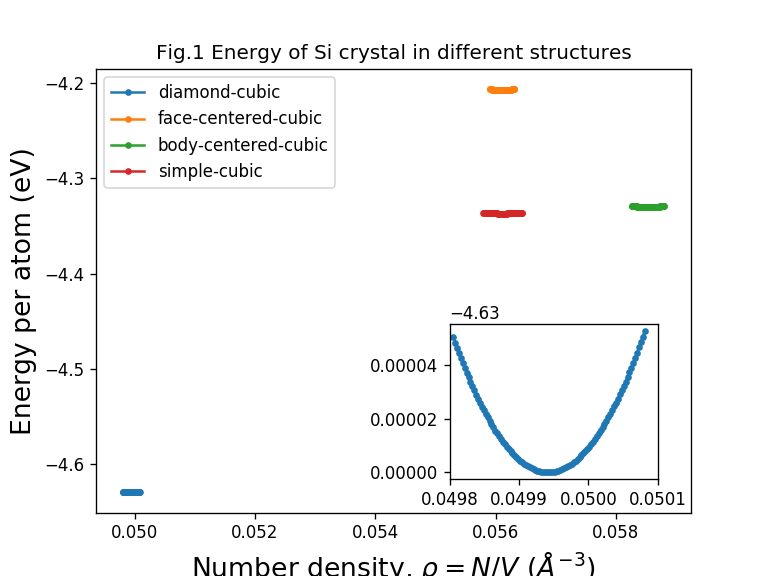

In [7]:
%matplotlib notebook
'''
Python script to plot the lattice energy of Si
in different structures (DC, FCC, BCC and SC)
'''

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

structure_list = ['diamond-cubic', 'face-centered-cubic', 
                  'body-centered-cubic', 'simple-cubic']
runsdir = os.path.join(mdpp_dir, 'runs/si_polytype')
font = {'size' : 16}

# plot the lattice energy vs number density with inset figure
fig0, ax0 = plt.subplots(1, 1)

for st in structure_list:
    filename = os.path.join(runsdir, st + '.dat')
    latt, rho, atomvol, epot, elat = np.loadtxt(filename, unpack=True)
    ax0.plot(rho, elat, '.-', label=st)

axins = inset_axes(ax0, width='35%', height='35%', loc=4, borderpad=2)
latt, rho, atomvol, epot, elat = np.loadtxt(os.path.join(runsdir, structure_list[0]+'.dat'), unpack=True)
axins.plot(rho, elat, '.-')
axins.set_xlim([0.0498, 0.0501])
ax0.set_xlabel(r'Number density, $\rho = N/V \,\, (\AA^{-3})$', **font)
ax0.set_ylabel('Energy per atom (eV)', **font)
ax0.set_title(r'Fig.1 Energy of Si crystal in different structures')
ax0.legend()

plt.show()

**Fit the lattice energy of Diamond-Cubic (DC) Si to a quadratic curve**

Notice that we only fit a small portion of the energy data (near the energy minimum) to the quadratic function.  For lattice constants significantly deviating from the equilibrium value, the energy curve will not be well approximated by a quadratic function (i.e. fitting error would be large). 

From the fitting, the equilibrium lattice constant of DC Si is estimated to be $a_0 = 5.43095$ $\mathring A$.  The energy minimum of the quadratic curve gives the cohesive energy $E_{\rm coh} = -4.63 $ eV.

polynomial coefficients = [  2.06480723 -22.42773992  56.27199497]
a0   = 5.430952489545597 Angstrom
Ecoh = -4.6299999981315025 eV


<IPython.core.display.Javascript object>


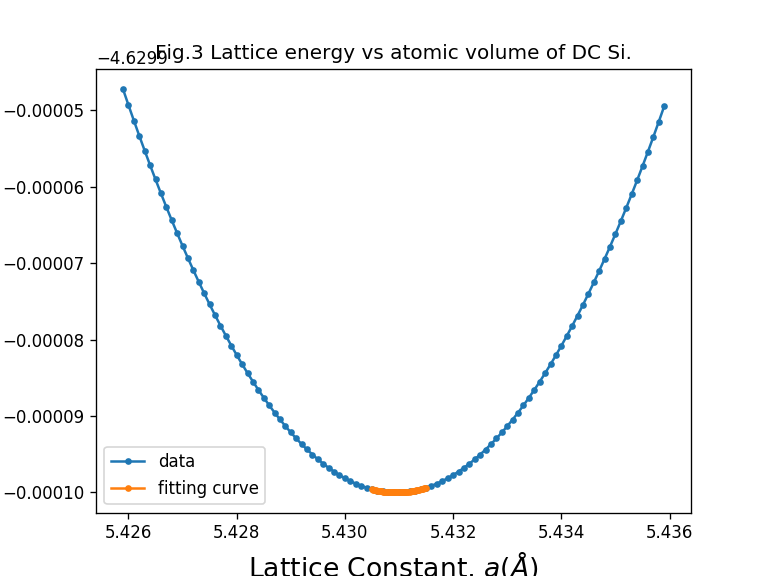

In [8]:
# plot the lattice energy vs lattice constant
# and find the equilibrium lattice constant, a_0
P = np.polyfit(latt, elat, 2)
print('polynomial coefficients = {}'.format(P))

a0 = -P[1]/(2*P[0])
Ecoh = P[2] - P[1]**2/(4*P[0])
print('a0   = {} Angstrom'.format(a0))
print('Ecoh = {} eV'.format(Ecoh))

latt_X = np.linspace(5.4305, 5.4315)
elat_Y = np.polyval(P, latt_X)

fig1, ax1 = plt.subplots(1, 1)
ax1.plot(latt, elat, '.-', latt_X, elat_Y, '.-C1')
ax1.set_xlabel(r'Lattice Constant, $a(\AA)$', fontsize=16)
ax1.set_ylabel('Energy per atom (eV)$', fontsize=16)
ax1.set_title('Fig.2 Energy vs lattice constant of DC Si')
ax1.legend(['data', 'fitting curve'])

plt.show()

## Bulk Modulus

The curvature of the $\Phi(\rho)$ curve near the minimum also tells us the bulk modulus of the crystal. The bulk modulus B is deﬁned as <sup>[1]</sup>

$$
B=V\left.\frac{\partial^2\Phi}{\partial V^2} \right\vert_{V=V_0}
$$

where $V_0$ is the equilibrium atomic volume (corresponding to the energy minimum). To compute the second derivative, plot $\Phi$ as a function of $V = 1 / \rho$ and ﬁt the $\Phi(V)$ curve by a quadratic function, i.e. $\Phi = c_0 + c_1V + c_2V^2$, as shown in Fig.3 below. 

This can be done by the numpy polyfit and the result is $c_2 = 0.016879 (eV/Å^6)$ (which is `P2[0]` in the Python script). Then, with $V_0 = 20.023 (Å^3)$, the bulk modulus becomes

$$
B=2\times20.023\,(Å^3)\times0.016879\,({\rm eV/Å}^6)\times160.2\,({\rm GPa\,/\,(eV/Å^3)})=108.3\,{\rm GPa}
$$

[1] This is because $B = -V (\partial P / \partial V)$ and $P = - \partial \Phi / \partial V$.

polynomial coefficients = [ 0.01687863 -0.67593666  2.13728866]
V0   = 20.023440384491543 Angstrom^3
B = 108.28505215356915 GPa


<IPython.core.display.Javascript object>


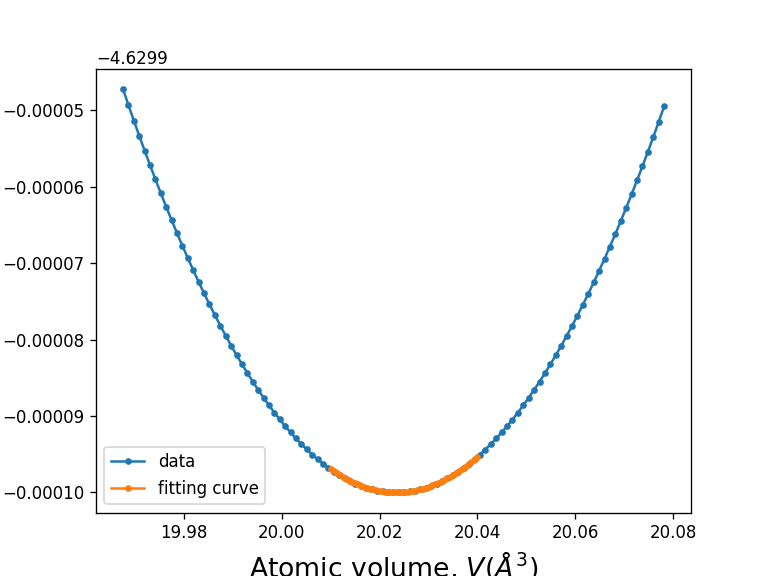

In [9]:
# plot the lattice energy vs atomic volume and find the bulk modulus, B
P2 = np.polyfit(atomvol,elat,2);
print('polynomial coefficients = {}'.format(P2))

V0 = -P2[1]/(2*P2[0])
B = 2*V0*P2[0]*160.2
print('V0   = {} Angstrom^3'.format(V0))
print('B = {} GPa'.format(B))

vol_X = np.linspace(20.01,20.04);
elat_Y2 = np.polyval(P2, vol_X);

fig2, ax2 = plt.subplots(1, 1)
ax2.plot(atomvol, elat, '.-', vol_X, elat_Y2, '.-C1')
ax2.set_xlabel(r'Atomic volume, $V(\AA^3)$',fontsize=16), 
ax2.set_ylabel('Energy per atom (eV)',fontsize=16)
ax1.set_title('Fig.3 Lattice energy vs atomic volume of DC Si.')
ax2.legend(['data','fitting curve'])
plt.show()

This result is consistent with an earlier report in the literature. In the elasticity theory _J. P. Hirth and J. Lothe, Theory of Dislocations, (Wiley, New York, 1982)_, the bulk modulus B is related to the other elastic constants through

$$
B=\lambda+ \frac{2}{3} \mu\quad \texttt{for isotropic material}\\
B=\frac{1}{3}(C_{11}+2C_{12})\quad\texttt{for cubic material}
$$

where $\lambda$ and $\mu$ are Lamé's constants and $C_{11}$ and $C_{12}$ are cubic elastic constants. From this relation, the bulk modulus would be 98.4 GPa if we calculate it from the experimental value of $C_{11}$ = 165.7 GPa and $C_{12}$ = 63.9 GPa for silicon. The discrepancy between the simulation and experimental results in the bulk modulus is partly because the simulation results corresponds to the ideal case of T = 0 K, while the experimental result is obtained at room temperature T = 300 K. The elastic constants generally decreases with increasing temperature. The discrepancy may also come from the empirical nature of the interatomic potential model. Different parameterization of the potential model generally leads to slightly different predictions of the elastic constants.

**LAMMPS input script**

The input file [in.equillatt_bulk_mod](http://localhost:8888/edit/scripts/ME346B/in.equillatt_bulk_mod) is what you can use to perform the same kind of bulk modulus calculations as above using the [LAMMPS](https://lammps.sandia.gov/) program (for the original SW potential model).

**<font size=+1>Exercise 1</font>**

Calculate the equilibrium lattice constant, cohesive energy, and bulk modulus of FCC copper (Cu) using the EAM potential. 

**Write a script file [`cu_bulkmod.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/cu_bulkmod.mdpp.py)** to create FCC structure of Cu with different lattice constants and save the data into file.

**Compile the eam executable**

In [ ]:
%%sh
cd $MDPLUS_DIR
make clean; make eam SYS=$MDPLUS_SYS build=R PY=yes

**After writing the script file [`cu_bulkmod.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/cu_bulkmod.mdpp.py), execute it with eam by running the following cell**

In [ ]:
%%sh
cd $MDPLUS_DIR
$MDPLUS_EXE scripts/ME346B/cu_bulkmod.mdpp.py

**Load the energy data from file and fit the data to curve**

What are your predictions of the equilibrium lattice constant, cohesive energy and bulk modulus of Cu?

In [ ]:
# Your Python code here
# load the data file
# plot the data
# fit the data to quadratic curve
# compute and print out the equilibrium lattice constant (a0), cohesive energy (Ecoh), bulk modulus (B)


**<font size=+1>Exercise 2</font>**

Calculate the equilibrium lattice constant, cohesive energy, and bulk modulus of BCC copper (Ta) using the Finnis-Sinclair potential. 

**Write a script file [`ta_bulkmod.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/ta_bulkmod.mdpp.py)** to create BCC structure of Ta with different lattice constants and save the data into file.

**Compile the fs executable**

In [ ]:
%%sh
cd $MDPLUS_DIR
make clean; make fs SYS=$MDPLUS_SYS build=R PY=yes

**After writing the script file [`ta_bulkmod.mdpp.py`](http://localhost:8888/edit/scripts/ME346B/ta_bulkmod.mdpp.py), execute it with fs by running the following cell**

In [ ]:
%%sh
cd $MDPLUS_DIR
$MDPLUS_EXE scripts/ME346B/ta_bulkmod.mdpp.py

**Load the energy data from file and fit the data to curve**

What are your predictions of the equilibrium lattice constant, cohesive energy and bulk modulus of Ta?

In [ ]:
# Your Python code here
# load the data file
# plot the data
# fit the data to quadratic curve
# compute and print out the equilibrium lattice constant (a0), cohesive energy (Ecoh), bulk modulus (B)
